## Objective

* To find all intrinsic and extrinsic parameters of a camera.
* Intrinsic parameters are specific to a camera. It includes information like focal length (f_x,f_y), optical centers (c_x, c_y) etc. It is also called camera matrix.
* Extrinsic parameters corresponds to rotation and translation vectors which translates a coordinates of a 3D point to a coordinate system.



## Approach

* we provide some sample images of a well defined pattern (eg, chess board) and find specific points in it ( square corners in chess board).
* We find the the correaltion between the points in the image and their corresponding 3D world coordiantes. 
* We apply DLT on the above points inorder solver for the camera's intrinsic and extrinsic parameters.

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from glob import glob

im_left = cv2.imread('data/left01.jpg')
print (im_left.shape)
print (im_right.shape)

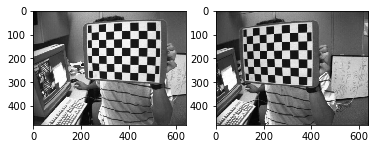

In [15]:
plt.subplot(121)
plt.imshow(im_left[...,::-1])
plt.subplot(122)
plt.imshow(im_right[...,::-1])
plt.show()

## Finding the corner points in the image

* We need to pass what kind of pattern we are looking, like 8x8 grid, 5x5 grid etc. In this example, we use 7x6 grid. (Normally a chess board has 8x8 squares and 7x7 internal corners). 
* The above function returns the corner points and retval which will be True if pattern is obtained. These corners will be placed in an order (from left-to-right, top-to-bottom)
* The ret value returned by the function is True if the checkerboard was completely detected and False if partially detected. 

In [16]:
ret, corners = cv2.findChessboardCorners(im_left, (7,6))

In [17]:
corners=corners.reshape(-1,2)
print (corners.shape)
print (corners[0])

(42, 2)
[ 475.44540405  264.75949097]


## Visualizing the points obtained.

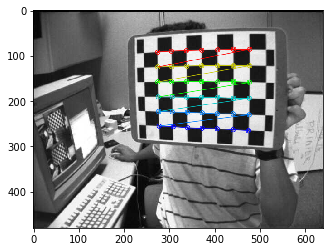

In [18]:
im_left_vis=im_left.copy()
cv2.drawChessboardCorners(im_left_vis, (7,6), corners, ret) 
plt.imshow(im_left_vis)
plt.show()

## Corresponding 3D points

*  For simplicity, we can say chess board was kept stationary at XY plane, (so Z=0 always) and camera was moved.
*  This consideration helps us to find only X,Y values.
* Now for X,Y values, we can simply pass the points as (0,0), (1,0), (2,0), ... which denotes the location of points.
* To create such array, we first create a meshgrid which will give us all combinations of X-Y coordinates

In [19]:
x,y=np.meshgrid(range(7),range(6))
print ("x:\n",x)
print ("y:\n",y)

x:
 [[0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]]
y:
 [[0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5]]


To obtain our vector, we first reshape the matrices x and y to obtain column vectors. Then, we stack the vectors vertically and add a zero vector the same size as the number of corner points detected in our image. (In our case it is 42)

In [41]:
world_points=np.hstack((x.reshape(42,1),y.reshape(42,1),np.zeros((42,1)))).astype(np.float32)
# print(world_points)

In [21]:
print (corners[0],'->',world_points[0])
print (corners[35],'->',world_points[35])

[ 475.44540405  264.75949097] -> [ 0.  0.  0.]
[ 477.60940552   86.34799957] -> [ 0.  5.  0.]


In [35]:
_3d_points=[]
_2d_points=[]
import pdb
img_paths=glob('data/*.jpg') #get paths of all all images
for path in img_paths:
    im=cv2.imread(path)
    
    ret, corners = cv2.findChessboardCorners(im, (7,6))
    
    if ret: #add points only if checkerboard was correctly detected:
        _2d_points.append(corners) #append current 2D points
        _3d_points.append(world_points) #3D points are always the same


ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d_points, _2d_points, (im.shape[1],im.shape[0]), None, None)

print ("Ret:",ret)
print ("Mtx:",mtx," ----------------------------------> [",mtx.shape,"]")
print ("Dist:",dist," ----------> [",dist.shape,"]")
print ("rvecs:",rvecs," --------------------------------------------------------> [",rvecs[0].shape,"]")
print ("tvecs:",tvecs," -------------------------------------------------------> [",tvecs[0].shape,"]")

Ret: 0.5245386708618297
Mtx: [[ 533.67644879    0.          334.16192166]
 [   0.          533.80412208  239.53163881]
 [   0.            0.            1.        ]]  ----------------------------------> [ (3, 3) ]
Dist: [[-0.31304377  0.22085156  0.00055065 -0.00114444 -0.18436053]]  ----------> [ (1, 5) ]
rvecs: [array([[ 0.4876725 ],
       [-0.16331636],
       [-1.73843414]]), array([[-0.41437904],
       [ 0.2476724 ],
       [-3.09670776]]), array([[-0.45450163],
       [ 0.26921649],
       [-3.08301825]]), array([[-0.3058838 ],
       [ 0.37737389],
       [-1.44049113]]), array([[ 0.49649178],
       [-0.19105439],
       [-1.73458601]]), array([[-0.46104109],
       [-0.07235765],
       [-1.33074749]]), array([[-0.35428382],
       [-0.22265723],
       [-1.56731426]]), array([[ 0.41360973],
       [ 0.67374158],
       [-1.33861053]]), array([[-0.25770873],
       [-0.40584317],
       [-2.75391748]]), array([[-0.31701655],
       [ 0.1784713 ],
       [-1.23616079]]), array

According to the documentation for **cv2.calibrateCamera** function, The function returns the following values:

ret: the mean reprojection error (it should be as close to zero as possible);
mtx: the matrix of intrisic parameters;
dist: the distortion parameters;
rvecs: the rotation vectors (one per image);
tvecs: the translation vectors (one per image).

## Image Rectification

* Images taken by a camera might seem to be distorted due to radial or tangential distortion.
* using the parameters returned by the caliberate Camera funtion we can rectify the distorted image.

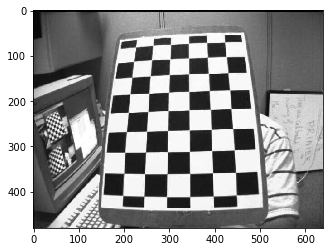

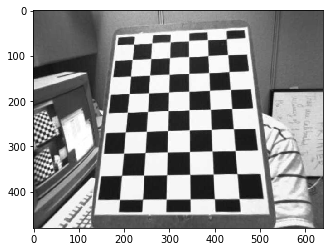

In [46]:

im=cv2.imread('data/left12.jpg')[...,::-1]
im_undistorted=cv2.undistort(im, mtx, dist)
# plt.subplot(121)
plt.imshow(im)
# plt.subplot(122)
plt.show()
plt.imshow(im_undistorted)
plt.show()